# $\mathcal{H}$-BEM - scattering by Cantor dust ($n=3$)
First example...
* Uses Galerkin, but we will see collocation is straightforward too
* Uses *singularity subtraction*, but defaults to Andrea's *near miss* quadrature if less information about the kernel is provided.

In [1]:
include("src/HausdorffBEM.jl")
using .HausdorffBEM

Define the Cantor Dust, wavenumber and incident wave direction:

In [22]:
α = 0.2
Γ = CantorDust(α);
k = 2.0
d = [1/sqrt(3),1/sqrt(3),1/sqrt(3)]
uinc(x_1::Float64, x_2::Float64, x_3::Float64) = exp.(im*k*(x_1*d[1] + x_2*d[2]+ x_3*d[3]))

uinc (generic function with 1 method)

Now check $\mathrm{dim}_H\Gamma$

In [23]:
dimH(Γ)

0.8613531161467861

Assign to `Φ` the following kernel object, which contains information necessary to subtract the singularity, and integrate seperately.

In [19]:
Φ = Helmholtz3DscreenKernel(Γ, k);

Now define the trace $f:=u^{\mathrm{inc}}|_\Gamma$

In [20]:
f(x_1::Float64, x_2::Float64) = uinc(x_1,x_2,0.0);

Now define approximation parameters $\ell$ and $Q$, where we have $4^\ell$ DOFs and each integral is approximated with $4^Q$ quadrature points:

In [21]:
ℓ = 3
Q = 3;

Construct the basis $V$, and project it onto the solution space:

In [24]:
V = MakeBasis(Γ,ℓ)
coeffs = hBEMsolve(Φ,f,V,Q);


        a non-zero scattered field. Setting solution to zero.


Now get far-field pattern:

Getting far-field data: 100%|███████████████████████████| Time: 0:01:49


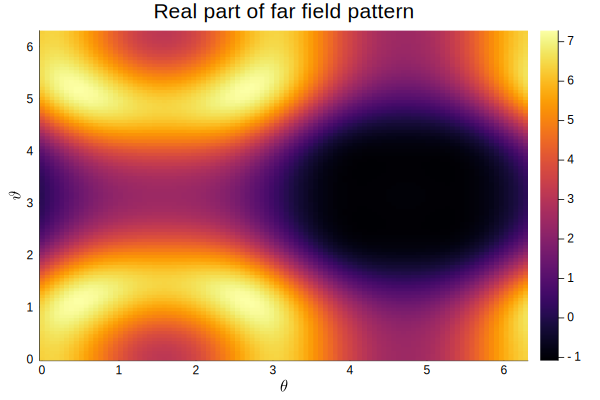

In [8]:
using Plots
θ = collect(range(0, stop=2π, length=100))
F = FarField(θ, θ, V, coeffs, k)
heatmap(θ,θ,real(F), title = "Real part of far field pattern")
xlabel!("\$\\theta\$")
ylabel!("\$\\vartheta\$")

# Next steps:
* Generalise to IFSs with $\nu$ components
* Check convergence rates of integrals as $\alpha\to_+1/4$
* Make matlab version of *singularity subtraction* for Andrea
* Implement Simon's quadrature as a third alternative?